<h1><strong>Deep Learning Project 1</strong></h1>
<h2><strong>Linear & Neural Network Regression</strong></h2>

<h3>Name: Arvish Pandey (Undergrad)</h3>

<h5>Description:</h5>
<p>
    The project will use the same dataset to train a linear regression model and a deep fully 
connected neural network.Iu will compare the model’s performance using this datasetep
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
dataset = pd.read_csv('cancer_reg.csv', encoding='latin1')

<h4><strong>Step 1: Data Questions</h4>

<h5>How many data samples are included in the dataset? </h5>

In [4]:
r, c = dataset.shape
print(f"Total number of data samples: {r}")

Total number of data samples: 3047


<h5>Which problem will this dataset try to address?</h5>

<p>
    The dataset is designed to predict cancer mortality rates (the TARGET_deathRate column). This is a regression problem where the goal is to estimate the mortality rate based on various factors.
</p>

<h5>What is the minimum value and the maximum value in the dataset?</h5>

In [5]:
print(f"MINIMUM value in the dataset:\n{dataset.min()}")
print()
print(f"MAXIMUM value in the dataset:\n{dataset.max()}")

MINIMUM value in the dataset:
avgAnnCount                                             6.0
avgDeathsPerYear                                          3
TARGET_deathRate                                       59.7
incidenceRate                                         201.3
medIncome                                             22640
popEst2015                                              827
povertyPercent                                          3.2
studyPerCap                                             0.0
MAX_binnedInc                                       22640.0
MIN_binnedInc                                       34218.1
MedianAge                                              22.3
MedianAgeMale                                          22.4
MedianAgeFemale                                        22.3
Geography                  Abbeville County, South Carolina
AvgHouseholdSize                                     0.0221
PercentMarried                                         23.1
PctNoHS18_

<h5>How many features in each data samples?</h5>

In [6]:
# Print the number of features
print(f"Number of features in each sample: {c}")

Number of features in each sample: 35


<h5>Does the dataset have any missing information? E.g., missing features.</h5>

In [7]:
# Check for missing values
missing_values = dataset.isnull().sum()
print('The columns and their missing values are:')
print(missing_values[missing_values > 0])

The columns and their missing values are:
PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64


<h5>What is the label of this dataset ?</h5>

<p>
    The label (target variable) for this dataset is TARGET_deathRate, which represents the cancer mortality rate. This is the value we want to predict.
</p>

<h5>How many percent of data will you use for training, validation and testing?</h5>

In [8]:
# Split the dataset into 70% training, 15% validation, and 15% testing
# This is most common percentage of dataset split
X = dataset.drop('TARGET_deathRate', axis=1)
y = dataset['TARGET_deathRate']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(f"Training data: {len(X_train)} samples")
print(f"Validation data: {len(X_val)} samples")
print(f"Testing data: {len(X_test)} samples")

Training data: 2132 samples
Validation data: 457 samples
Testing data: 458 samples


<h5> What kind of data pre-processing will you use for your training dataset?</h5>

<p>
    I will be:
    - Handling missing values
    - Standardize the features
    - Using One-Hot Encoding
</p>

<h4><strong>Step 2: Exploratory Data Analysis</h4>

In [9]:
dataset.head(10)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MAX_binnedInc,MIN_binnedInc,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,61494.5,125635.0,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,61494.6,51046.4,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,61494.7,51046.4,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,61494.8,45201.0,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48021.6,51046.4,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,51046.4,54545.6,...,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,37413.8,40362.7,...,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,37413.8,40362.7,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
8,88.0,36,190.5,459.4,42579,13088,22.3,0.000000,40362.7,42724.4,...,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
9,4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,54545.6,61494.5,...,NaN,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430


<h5>Identify and calculate the percentage of missing values in each attribute</h5>

In [10]:
dataset.isnull().sum()/dataset.count()*100

avgAnnCount                  0.000000
avgDeathsPerYear             0.000000
TARGET_deathRate             0.000000
incidenceRate                0.000000
medIncome                    0.000000
popEst2015                   0.000000
povertyPercent               0.000000
studyPerCap                  0.000000
MAX_binnedInc                0.000000
MIN_binnedInc                0.000000
MedianAge                    0.000000
MedianAgeMale                0.000000
MedianAgeFemale              0.000000
Geography                    0.000000
AvgHouseholdSize             0.000000
PercentMarried               0.000000
PctNoHS18_24                 0.000000
PctHS18_24                   0.000000
PctSomeCol18_24            299.868766
PctBachDeg18_24              0.000000
PctHS25_Over                 0.000000
PctBachDeg25_Over            0.000000
PctEmployed16_Over           5.250432
PctUnemployed16_Over         0.000000
PctPrivateCoverage           0.000000
PctPrivateCoverageAlone     24.979491
PctEmpPrivCo

In [11]:
dataset.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MAX_binnedInc,MIN_binnedInc,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,43767.770102,54003.470233,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,10473.104936,24993.679829,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22640.000000,34218.100000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37413.800000,40362.700000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,45201.000000,48021.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,51046.400000,54545.600000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,61494.800000,125635.000000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


<h4>Dataset Preprocessing</h4>

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Separate features and target label
X = dataset.drop(['TARGET_deathRate', 'Geography'], axis=1)  # Drop the target, geography column from features
y = dataset['TARGET_deathRate']               # Target column

# Step 2: Split the dataset into training, validation, and testing sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Step 3: Identify which columns are categorical (string) and which are numerical (float)
categorical_columns = X.select_dtypes(include=['object']).columns  # String columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns  # Float columns

# Step 4: Create transformers for preprocessing

# Impute missing values in numerical columns with mean, and scale them
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Impute missing values in categorical columns with 'missing', and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Step 5: Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Step 6: Apply the preprocessor to the training, validation, and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Step 7: Output the shapes of the preprocessed datasets to confirm
print(f"Training set shape after preprocessing: {X_train_preprocessed.shape}")
print(f"Validation set shape after preprocessing: {X_val_preprocessed.shape}")
print(f"Test set shape after preprocessing: {X_test_preprocessed.shape}")

Training set shape after preprocessing: (2132, 33)
Validation set shape after preprocessing: (457, 33)
Test set shape after preprocessing: (458, 33)


<h4>Linear Regression Model Training</h4>

Final Training MSE: 343.1755066534661
Final Validation MSE: 425.22871968360016
Final Training R²: 0.5430920829091159
Final Validation R²: 0.4862282485523637


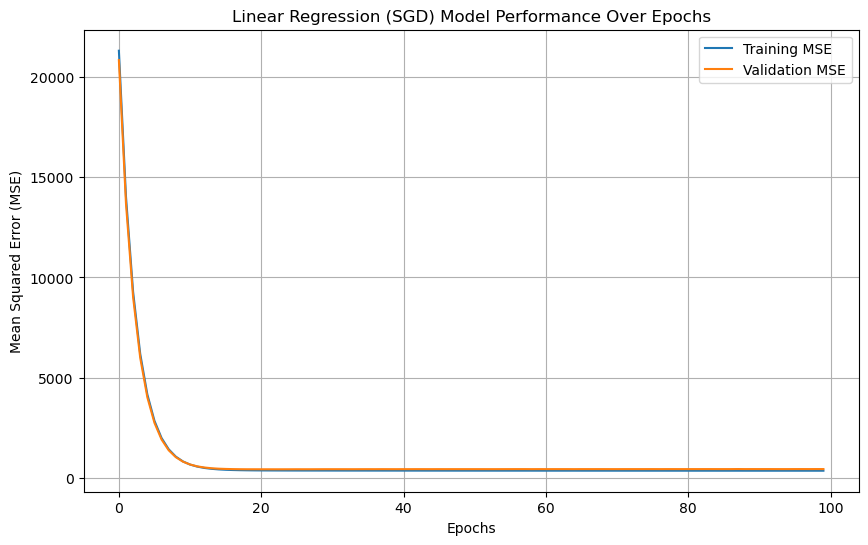

In [412]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the SGDRegressor model
linear_model = SGDRegressor(learning_rate='constant', eta0=0.0001)

# Step 2: Track MSE and R² for training and validation sets over epochs
n_epochs = 100
train_errors = []
val_errors = []
train_r2_scores = []
val_r2_scores = []

# Step 3: Train the model using partial_fit and compute MSE and R² after each epoch
for epoch in range(n_epochs):
    # Fit the model incrementally on the training data
    linear_model.partial_fit(X_train_preprocessed, y_train)
    
    # Calculate MSE and R² for the training set
    y_train_pred = linear_model.predict(X_train_preprocessed)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_errors.append(train_mse)
    train_r2_scores.append(train_r2)
    
    # Calculate MSE and R² for the validation set
    y_val_pred = linear_model.predict(X_val_preprocessed)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_errors.append(val_mse)
    val_r2_scores.append(val_r2)

# Print final MSE for training and validation sets after the last epoch
print(f"Final Training MSE: {train_errors[-1]}")
print(f"Final Validation MSE: {val_errors[-1]}")

# Print final R² for training and validation sets after the last epoch
print(f"Final Training R²: {train_r2_scores[-1]}")
print(f"Final Validation R²: {val_r2_scores[-1]}")

# Step 4: Plot the MSE for training and validation sets over epochs
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_epochs), train_errors, label="Training MSE")
plt.plot(np.arange(n_epochs), val_errors, label="Validation MSE")
plt.title("Linear Regression (SGD) Model Performance Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()

<h4>Deep Neural Networks Training</h4>

<h4>DNN-16 Model</h4>

In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/100


C:\Users\ARVISH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30156.1074 - val_loss: 9215.7627
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 6304.0654 - val_loss: 2850.1538
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 2164.7041 - val_loss: 1483.9656
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 1222.2766 - val_loss: 1045.3700
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 872.2924 - val_loss: 814.8233
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 657.9230 - val_loss: 670.7303
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 538.7554 - val_loss: 625.1987
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 513.9456 - val_loss: 562.3265
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 454.2638 - val_loss: 541.4551
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 435.5122 - val_loss: 527.2521
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 412.2094 - val_loss: 484.7814
Ep

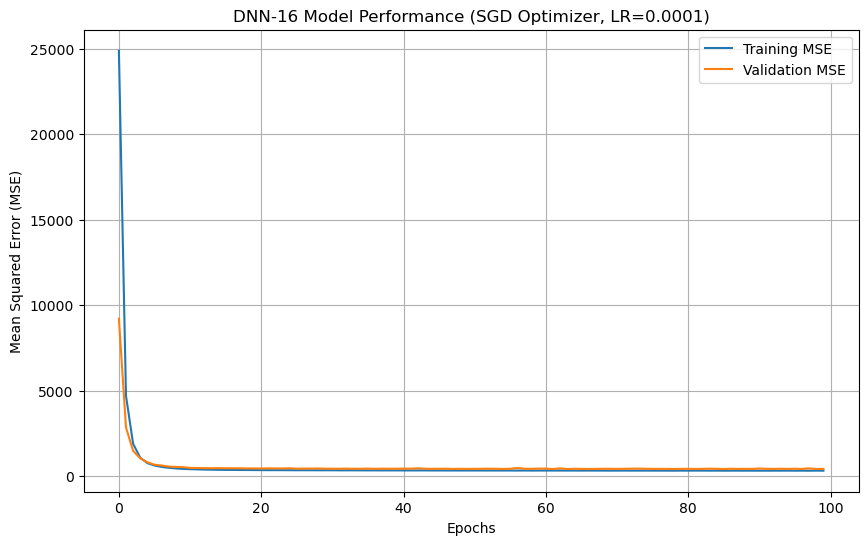

In [436]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the DNN-16 model with correct input shape
dnn_16_model = Sequential([
    Dense(16, input_shape=(X_train_preprocessed.shape[1],), activation='relu'),  # Use input_shape instead of input_dim
    Dense(1)  # Output layer (for regression, we have a single output neuron)
])

# Step 2: Compile the model with SGD optimizer and a custom learning rate of 0.1
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0009)
dnn_16_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error')

# Train the model
dnn_16_history = dnn_16_model.fit(X_train_preprocessed, y_train, 
                                  validation_data=(X_val_preprocessed, y_val), 
                                  epochs=100, verbose=1)

# Predict on the test set
y_test_pred_dnn_16 = dnn_16_model.predict(X_test_preprocessed)

# Calculate and print the MSE for the test set
mse_test_dnn_16 = mean_squared_error(y_test, y_test_pred_dnn_16)

# Calculate R-squared for the test set
r2_test_dnn_16 = r2_score(y_test, y_test_pred_dnn_16)

print(f"DNN-16 Test MSE: {mse_test_dnn_16}")
print(f"DNN-16 Test R²: {r2_test_dnn_16}")

# Step 6: Plot the model performance (MSE) over the epochs
# Extract loss and validation loss from the training history
train_loss = dnn_16_history.history['loss']
val_loss = dnn_16_history.history['val_loss']

# Create the performance plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training MSE")
plt.plot(val_loss, label="Validation MSE")
plt.title("DNN-16 Model Performance (SGD Optimizer, LR=0.0001)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()

<h4>DNN-30-8 Model</h4>

Epoch 1/100


C:\Users\ARVISH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22334.3145 - val_loss: 1293.1963
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 932.8066 - val_loss: 659.5041
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 576.1797 - val_loss: 555.3699
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 449.8454 - val_loss: 528.0743
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 403.4216 - val_loss: 491.0397
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 432.9545 - val_loss: 931.7536
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 449.7755 - val_loss: 482.9800
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 392.3928 - val_loss: 506.3696
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 391.0807 - val_loss: 546.5482
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 365.5676 - val_loss: 451.7337
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 366.9349 - val_loss: 435.6083
Epoch 12/100

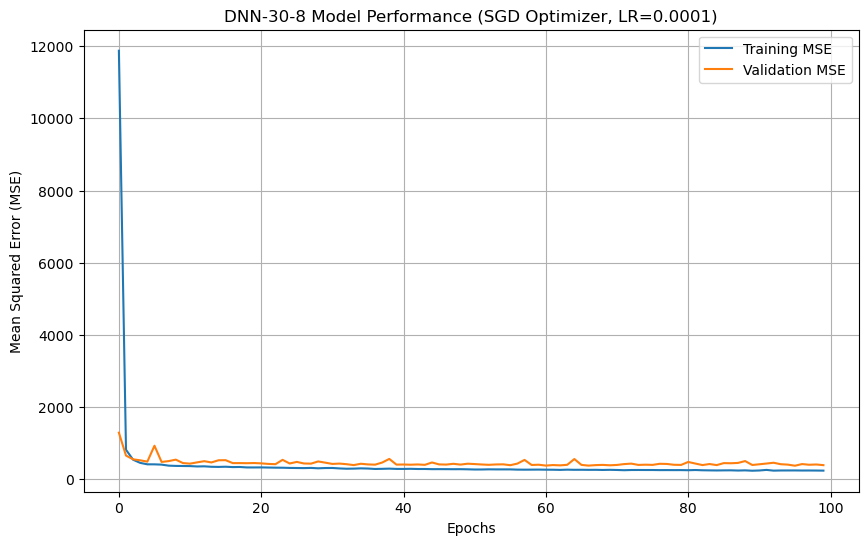

In [446]:
# Define the model (DNN-30-8: two hidden layers)
dnn_30_8_model = Sequential([
    Dense(30, input_shape=(X_train_preprocessed.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Step 2: Compile the model with SGD optimizer and a custom learning rate of 0.1
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0009)
dnn_30_8_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error')

# Train the model
history = dnn_30_8_model.fit(X_train_preprocessed, y_train, validation_data=(X_val_preprocessed, y_val), epochs=100, verbose=1)

# Predict on the test set
y_test_pred_dnn_30_8 = dnn_30_8_model.predict(X_test_preprocessed)

# Calculate MSE for the test set
mse_test_dnn_30_8 = mean_squared_error(y_test, y_test_pred_dnn_30_8)

# Calculate R-squared for the test set
r2_test_dnn_30_8 = r2_score(y_test, y_test_pred_dnn_30_8)

# Print the MSE and R²
print(f"DNN-30-8 Test MSE: {mse_test_dnn_30_8}")
print(f"DNN-30-8 Test R²: {r2_test_dnn_30_8}")

# Step 6: Plot the model performance (MSE) over the epochs
# Extract loss and validation loss from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the performance plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training MSE")
plt.plot(val_loss, label="Validation MSE")
plt.title("DNN-30-8 Model Performance (SGD Optimizer, LR=0.0001)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()

<h4>DNN-30-16-8 Model</h4>

Epoch 1/100


C:\Users\ARVISH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20822.7793 - val_loss: 1069.2300
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 1306.8676 - val_loss: 1553.0693
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 755.8123 - val_loss: 672.7858
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 756.1384 - val_loss: 2424.4314
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 795.9475 - val_loss: 1586.2765
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 571.5157 - val_loss: 495.0917
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 799.9942 - val_loss: 696.0007
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 590.6401 - val_loss: 577.4651
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 518.7322 - val_loss: 761.1266
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 899.2465 - val_loss: 451.8284
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 472.7325 - val_loss: 1055.7151
Epoch

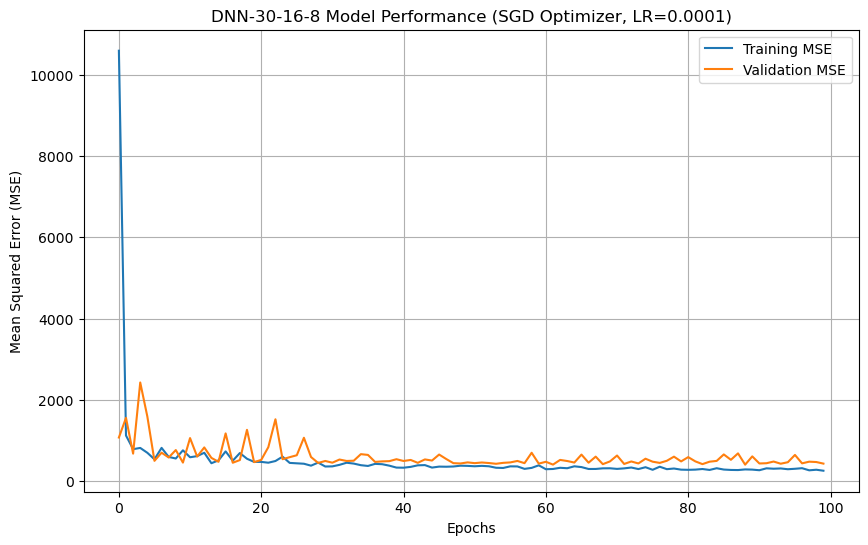

In [468]:
# Define the model (DNN-30-16-8: three hidden layers)
dnn_30_16_8_model = Sequential([
    Dense(30, input_shape=(X_train_preprocessed.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Step 2: Compile the model with SGD optimizer and a custom learning rate of 0.1
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0009)
dnn_30_16_8_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error')

# Train the model
history = dnn_30_16_8_model.fit(X_train_preprocessed, y_train, validation_data=(X_val_preprocessed, y_val), epochs=100, verbose=1)

# Predict on the test set
y_test_pred_dnn_30_16_8 = dnn_30_16_8_model.predict(X_test_preprocessed)

# Calculate MSE for the test set
mse_test_dnn_30_16_8 = mean_squared_error(y_test, y_test_pred_dnn_30_16_8)

# Calculate R-squared for the test set
r2_test_dnn_30_16_8 = r2_score(y_test, y_test_pred_dnn_30_16_8)

# Corrected print statement for DNN-30-16-8
print(f"DNN-30-16-8 Test MSE: {mse_test_dnn_30_16_8}")
print(f"DNN-30-16-8 Test R²: {r2_test_dnn_30_16_8}")

# Step 6: Plot the model performance (MSE) over the epochs
# Extract loss and validation loss from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the performance plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training MSE")
plt.plot(val_loss, label="Validation MSE")
plt.title("DNN-30-16-8 Model Performance (SGD Optimizer, LR=0.0001)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()

<h4>DNN-30-16-8-4</h4>

Epoch 1/100


C:\Users\ARVISH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21781.1191 - val_loss: 29536.9062
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 12904.0469 - val_loss: 767.4684
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 779.0999 - val_loss: 726.3099
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 524.8408 - val_loss: 402.5911
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 492.6225 - val_loss: 404.0255
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 370.5179 - val_loss: 414.5856
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 411.1310 - val_loss: 413.1648
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 372.0288 - val_loss: 420.5133
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 319.2386 - val_loss: 575.5971
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 364.4362 - val_loss: 505.1183
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 335.8023 - val_loss: 402.1479
Epoch

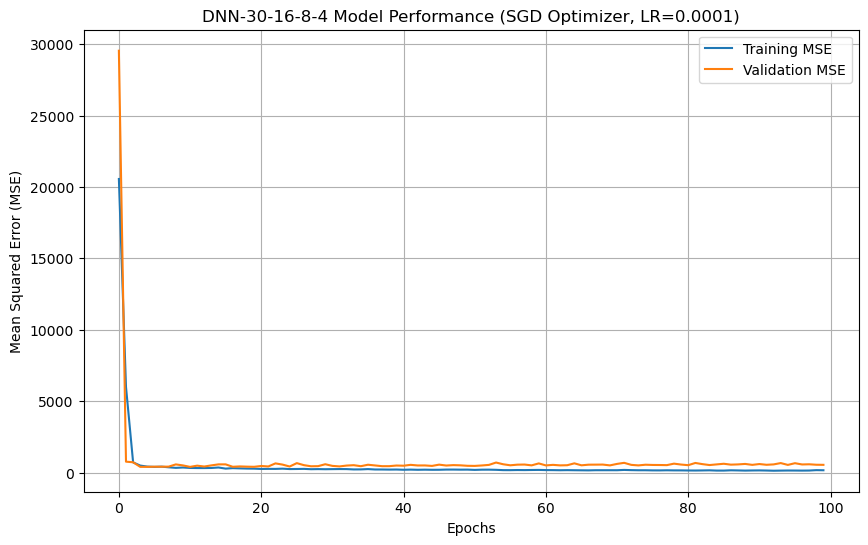

In [480]:
# Define the model (DNN-30-16-8: three hidden layers)
dnn_30_16_8_4_model = Sequential([
    Dense(30, input_shape=(X_train_preprocessed.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Step 2: Compile the model with SGD optimizer and a custom learning rate of 0.1
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0009)
dnn_30_16_8_4_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error')

# Train the model
history = dnn_30_16_8_4_model.fit(X_train_preprocessed, y_train, validation_data=(X_val_preprocessed, y_val), epochs=100, verbose=1)

# Predict on the test set
y_test_pred_dnn_30_16_8_4 = dnn_30_16_8_4_model.predict(X_test_preprocessed)

# Calculate MSE for the test set
mse_test_dnn_30_16_8_4 = mean_squared_error(y_test, y_test_pred_dnn_30_16_8_4)

# Calculate R-squared for the test set
r2_test_dnn_30_16_8_4 = r2_score(y_test, y_test_pred_dnn_30_16_8_4)

# Corrected print statement for DNN-30-16-8
print(f"DNN-30-16-8-4 Test MSE: {mse_test_dnn_30_16_8_4}")
print(f"DNN-30-16-8-4 Test R²: {r2_test_dnn_30_16_8_4}")

# Step 6: Plot the model performance (MSE) over the epochs
# Extract loss and validation loss from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the performance plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training MSE")
plt.plot(val_loss, label="Validation MSE")
plt.title("DNN-30-16-8-4 Model Performance (SGD Optimizer, LR=0.0001)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()